In [75]:
!pip install opendatasets

In [76]:
#import the modules
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od

In [77]:
od.download("https://www.kaggle.com/datasets/saranpannasuriyaporn/male-female-height-and-weight")

Skipping, found downloaded files in "./male-female-height-and-weight" (use force=True to force download)


In [78]:
#import the data
data = pd.read_csv("male-female-height-and-weight/Test set.csv")

In [79]:
data.head(5)

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female


In [80]:
#change the string data to 1 and 0
data.loc[data['Sex'] == 'Male','Sex'] = 1
data.loc[data['Sex'] == 'Female','Sex'] = 0

In [81]:
data.head(5)

,Height,Weight,Sex
0,146.323241,59.861065,0
1,175.695412,77.863687,1
2,183.216164,72.131992,1
3,184.245269,77.546000,1
4,132.302261,55.188496,0


In [82]:
x.head(5)

,Height,Weight
0,146.323241,59.861065
1,175.695412,77.863687
2,183.216164,72.131992
3,184.245269,77.546000
4,132.302261,55.188496


In [83]:
x = data.drop(['Sex'],axis = 1)
y = data['Sex']

In [84]:
y = y.astype('int')
y.dtype

dtype('int64')

In [85]:
y.head(5)

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

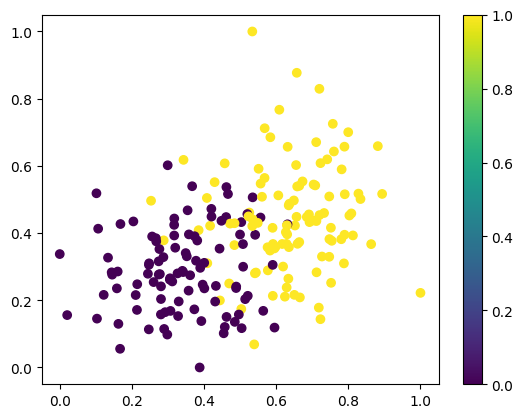

In [150]:
plt.scatter(x['Height'],x['Weight'] ,c = y)
plt.colorbar()
plt.show()

In [151]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [152]:
x_test.shape,x_train.shape

((41, 2), (164, 2))

In [153]:
data.shape

(205, 3)

In [154]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 66 to 102
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  164 non-null    float64
 1   Weight  164 non-null    float64
dtypes: float64(2)
memory usage: 3.8 KB


In [155]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 164 entries, 66 to 102
Series name: Sex
Non-Null Count  Dtype
--------------  -----
164 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


**Model Building**

In [156]:
#create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation ='relu',input_shape = (2,)),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

#compile model
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              metrics = ['accuracy'])

#train model
epoch_num = 10
history = model.fit(x_train,y_train,epochs = epoch_num)

Epoch 1/10
6/6 [==============================] - 1s 3ms/step - loss: 0.6923 - accuracy: 0.4695
Epoch 2/10
6/6 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5000
Epoch 3/10
6/6 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5000
Epoch 4/10
6/6 [==============================] - 0s 3ms/step - loss: 0.6896 - accuracy: 0.5000
Epoch 5/10
6/6 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.5000
Epoch 6/10
6/6 [==============================] - 0s 3ms/step - loss: 0.6880 - accuracy: 0.4939
Epoch 7/10
6/6 [==============================] - 0s 3ms/step - loss: 0.6875 - accuracy: 0.5122
Epoch 8/10
6/6 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.5183
Epoch 9/10
6/6 [==============================] - 0s 4ms/step - loss: 0.6865 - accuracy: 0.5183
Epoch 10/10
6/6 [==============================] - 0s 3ms/step - loss: 0.6859 - accuracy: 0.5305


**Model evaluation**

In [157]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 4)                 12        
                                                                 
 dense_25 (Dense)            (None, 1)                 5         
                                                                 
Total params: 17 (68.00 Byte)
Trainable params: 17 (68.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [158]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.6868 - accuracy: 0.4878


[0.6868035793304443, 0.4878048896789551]

In [159]:
y_pred = model.predict(x_test)

2/2 [==============================] - 0s 6ms/step


In [160]:
y_pred[:5]

array([[0.5124597 ],
       [0.5115534 ],
       [0.52486616],
       [0.4972305 ],
       [0.52025914]], dtype=float32)

In [161]:
y_test[:5]

15     0
9      1
100    1
132    0
68     1
Name: Sex, dtype: int64

In [162]:
#precision
precision = tf.keras.metrics.Precision()
precision.update_state(y_test,y_pred)
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.4871795>

In [163]:
#Recall
recall = tf.keras.metrics.Recall()
recall.update_state(y_test,y_pred)
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.95>

In [164]:
history.history

{'loss': [0.6923235058784485,
  0.6913915872573853,
  0.6903988122940063,
  0.6895979642868042,
  0.6887117028236389,
  0.6880413889884949,
  0.6875098347663879,
  0.6869455575942993,
  0.6864655017852783,
  0.6859190464019775],
 'accuracy': [0.4695121943950653,
  0.5,
  0.5,
  0.5,
  0.5,
  0.49390244483947754,
  0.5121951103210449,
  0.5182926654815674,
  0.5182926654815674,
  0.5304877758026123]}

<Axes: >

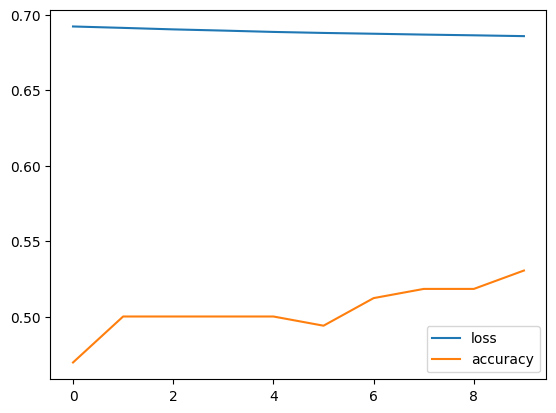

In [165]:
pd.DataFrame(history.history).plot()

**Improving model**

In [166]:
#create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation ='relu',input_shape = (2,)),
    tf.keras.layers.Dense(16,activation ="relu"),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

#compile model
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(lr = 0.0005),
              metrics = ['accuracy'])

#train model
epoch_num = 20
history = model.fit(x_train,y_train,epochs = epoch_num)

Epoch 1/20
6/6 [==============================] - 1s 5ms/step - loss: 0.6846 - accuracy: 0.5244
Epoch 2/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6726 - accuracy: 0.5244
Epoch 3/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6631 - accuracy: 0.5244
Epoch 4/20
6/6 [==============================] - 0s 4ms/step - loss: 0.6566 - accuracy: 0.5244
Epoch 5/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6505 - accuracy: 0.5244
Epoch 6/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6459 - accuracy: 0.5427
Epoch 7/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6407 - accuracy: 0.5549
Epoch 8/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6344 - accuracy: 0.5854
Epoch 9/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6275 - accuracy: 0.5915
Epoch 10/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6198 - accuracy: 0.5976
Epoch 11/20
6/6 [======================

In [176]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 64)                192       
                                                                 
 dense_30 (Dense)            (None, 16)                1040      
                                                                 
 dense_31 (Dense)            (None, 2)                 34        
                                                                 
Total params: 1266 (4.95 KB)
Trainable params: 1266 (4.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [168]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.5317 - accuracy: 0.8537


[0.5316809415817261, 0.8536585569381714]

In [169]:
y_pred = model.predict(x_test)

2/2 [==============================] - 0s 7ms/step


In [170]:
y_pred[:5]

array([[0.3941353 ],
       [0.70733905],
       [0.711924  ],
       [0.52746767],
       [0.58996886]], dtype=float32)

In [171]:
y_test[:5]

15     0
9      1
100    1
132    0
68     1
Name: Sex, dtype: int64

In [172]:
#precision
precision = tf.keras.metrics.Precision()
precision.update_state(y_test,y_pred)
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.7692308>

In [173]:
#Recall
recall = tf.keras.metrics.Recall()
recall.update_state(y_test,y_pred)
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

<Axes: >

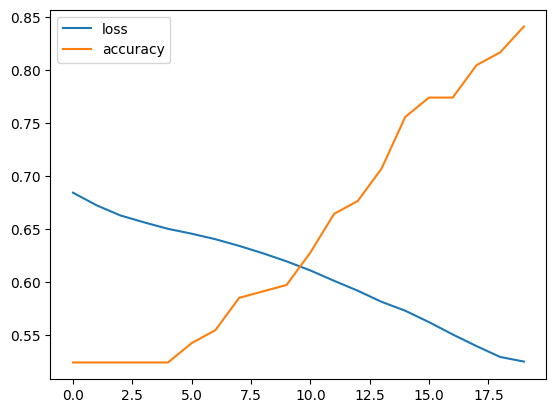

In [174]:
pd.DataFrame(history.history).plot()

In [148]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x = pd.DataFrame(x_scaled,columns = ['Height','Weight'])

In [149]:
x.head(5)

,Height,Weight
0,0.305685,0.265457
1,0.690767,0.455592
2,0.789367,0.395057
3,0.802859,0.452237
4,0.121865,0.216108


**Multicalss Classification**

In [175]:
#create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation ='relu',input_shape = (2,)),
    tf.keras.layers.Dense(16,activation ="relu"),
    tf.keras.layers.Dense(2,activation = 'softmax')
])

#compile model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(lr = 0.0005),
              metrics = ['accuracy'])

#train model
epoch_num = 20
history = model.fit(x_train,y_train,epochs = epoch_num)

Epoch 1/20
6/6 [==============================] - 1s 7ms/step - loss: 0.6799 - accuracy: 0.5244
Epoch 2/20
6/6 [==============================] - 0s 7ms/step - loss: 0.6727 - accuracy: 0.5244
Epoch 3/20
6/6 [==============================] - 0s 5ms/step - loss: 0.6666 - accuracy: 0.5244
Epoch 4/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6613 - accuracy: 0.5305
Epoch 5/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6560 - accuracy: 0.5366
Epoch 6/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6499 - accuracy: 0.5488
Epoch 7/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6426 - accuracy: 0.5793
Epoch 8/20
6/6 [==============================] - 0s 5ms/step - loss: 0.6360 - accuracy: 0.5732
Epoch 9/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6285 - accuracy: 0.5915
Epoch 10/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6207 - accuracy: 0.6037
Epoch 11/20
6/6 [======================

In [177]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 64)                192       
                                                                 
 dense_30 (Dense)            (None, 16)                1040      
                                                                 
 dense_31 (Dense)            (None, 2)                 34        
                                                                 
Total params: 1266 (4.95 KB)
Trainable params: 1266 (4.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [178]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 14ms/step - loss: 0.5220 - accuracy: 0.8537


[0.5219573974609375, 0.8536585569381714]

In [179]:
y_pred = model.predict(x_test)

2/2 [==============================] - 0s 6ms/step


In [180]:
y_pred[:5]

array([[0.5840417 , 0.4159583 ],
       [0.23427178, 0.7657283 ],
       [0.23548609, 0.7645139 ],
       [0.414207  , 0.585793  ],
       [0.35881174, 0.6411882 ]], dtype=float32)

In [181]:
y_test[:5]

15     0
9      1
100    1
132    0
68     1
Name: Sex, dtype: int64

In [185]:
import numpy as np
y_pred = np.argmax(y_pred,axis = 1)
y_pred[:5]

array([0, 1, 1, 1, 1])

In [186]:
y_test[:5]

15     0
9      1
100    1
132    0
68     1
Name: Sex, dtype: int64